# Analyse and balance classes from dataset

In [1]:
INPUT_DIR='../../input/kaggle-sea-lion/02/'
OUTPUT_DIR='../../output/kaggle-sea-lion/03/'

INPUT_NAME='lion-patches-0px'

SHOW_IMAGES = True
MAX_IMAGES = 1

#IMAGE_DIMS = (148,148,3)
#IMAGE_DIMS = (84,84,3)
IMAGE_DIMS = (32,32,3)

RANDOM_SEED = 1

#%prun print('test')
#%pdb

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os
import random
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

import modules.logging
from modules.logging import logger
import modules.lions as lions
from modules.utils import Timer
import modules.utils as utils

random.seed(RANDOM_SEED)

Using TensorFlow backend.


## Prepare output dir

In [3]:
utils.mkdirs(OUTPUT_DIR, recreate=True)
modules.logging.setup_file_logger(OUTPUT_DIR + 'out.log')
logger.info('Dir ' + OUTPUT_DIR + ' created')

2017-04-10 19:25:24,268 INFO Dir ../../output/kaggle-sea-lion/03/ created


## Rebalance dataset classes

In [4]:
input_h5file_path = INPUT_DIR + utils.dataset_name(INPUT_NAME, IMAGE_DIMS)
output_h5file_path = OUTPUT_DIR + utils.dataset_name(INPUT_NAME + '-balanced', IMAGE_DIMS)

logger.info('loading input dataset ' + input_h5file_path)
input_h5file = h5py.File(input_h5file_path, 'r')
with input_h5file:
    logger.info('creating output dataset ' + output_h5file_path)
    output_h5file = h5py.File(output_h5file_path, 'w')
    with output_h5file:
        logger.info('balancing classes')
        utils.dataset_xy_balance_classes_image(input_h5file, output_h5file, max_augmentation_ratio=5, max_undersampling_ratio=1)

2017-04-10 19:25:24,295 INFO loading input dataset ../../input/kaggle-sea-lion/02/lion-patches-0px-32-32.h5
2017-04-10 19:25:24,305 INFO creating output dataset ../../output/kaggle-sea-lion/03/lion-patches-0px-balanced-32-32.h5
2017-04-10 19:25:24,308 INFO balancing classes
2017-04-10 19:25:24,310 INFO > [started] traversing entire dataset in order to extract population classes distribution...
2017-04-10 19:25:24,558 INFO > [done]    traversing entire dataset in order to extract population classes distribution (248.434 ms)
2017-04-10 19:25:24,562 INFO population distribution
2017-04-10 19:25:24,564 INFO 0: 4791.0
2017-04-10 19:25:24,568 INFO 1: 3888.0
2017-04-10 19:25:24,569 INFO 2: 33161.0
2017-04-10 19:25:24,571 INFO 3: 17851.0
2017-04-10 19:25:24,573 INFO 4: 14906.0
2017-04-10 19:25:24,576 INFO 5: 58616.0
2017-04-10 19:25:24,577 INFO targeting items per class: 23328.0
2017-04-10 19:25:24,582 INFO augmentation/undersampling ratio per class
2017-04-10 19:25:24,584 INFO 0: 4.8691296180

|#########################| 133200/133213 100% 330s

2017-04-10 19:30:54,158 INFO > [done]    balancing dataset (329547.698 ms)
2017-04-10 19:30:54,160 INFO done


### Validate dataset

In [5]:
logger.info('class distribution BEFORE balancing')
with h5py.File(input_h5file_path, 'r') as input_h5:
    y = input_h5['Y'][()]
    count_classes = utils.class_distribution(y)
    logger.info(str(count_classes))

2017-04-10 19:30:54,179 INFO class distribution BEFORE balancing
2017-04-10 19:30:54,444 INFO [  4791.   3888.  33161.  17851.  14906.  58616.]


In [6]:
logger.info('class distribution AFTER balancing')
with h5py.File(output_h5file_path, 'r') as output_h5:
    y = output_h5['Y'][()]
    count_classes = utils.class_distribution(y)
    logger.info(str(count_classes))

2017-04-10 19:30:54,459 INFO class distribution AFTER balancing
2017-04-10 19:30:54,823 INFO [ 23328.  23328.  23301.  23328.  23328.  23322.]


2017-04-10 19:30:54,840 INFO showing 10 images
2017-04-10 19:30:54,848 INFO > [started] generating image patches. rows=2; cols=10...


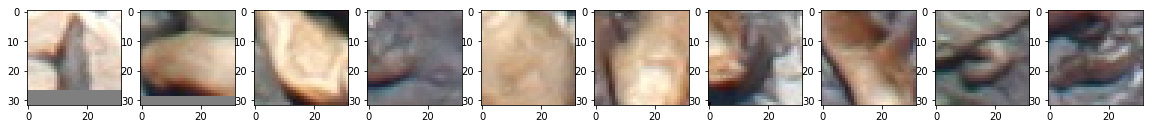

2017-04-10 19:30:57,272 INFO > [done]    generating image patches. rows=2; cols=10 (2424.312 ms)


In [7]:
with h5py.File(input_h5file_path, 'r') as input_h5:
    utils.show_images(input_h5['X'][0:10], cols=10, is_bgr=True, size=2)

2017-04-10 19:30:57,306 INFO showing 10 images
2017-04-10 19:30:57,308 INFO > [started] generating image patches. rows=2; cols=10...
/notebooks/datascience-snippets/kaggle-sea-lion/modules/utils.py:371: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  #order indexes by label
/notebooks/datascience-snippets/kaggle-sea-lion/modules/utils.py:391: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


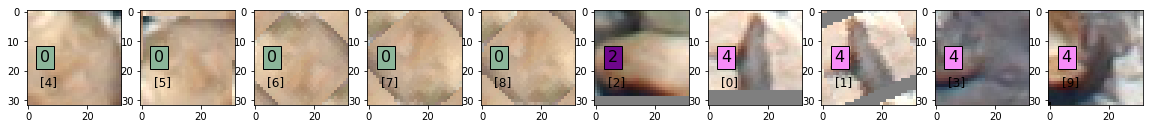

2017-04-10 19:30:59,607 INFO > [done]    generating image patches. rows=2; cols=10 (2299.127 ms)


In [8]:
with h5py.File(output_h5file_path, 'r') as output_h5:
    utils.show_images(output_h5['X'][0:10], image_labels=utils.categorical_to_label(output_h5['Y'][0:10]), cols=10, is_bgr=True, size=2)